<a href="https://colab.research.google.com/github/veillette/jupyterNotebooks/blob/main/Advanced%20Lab/CurveFittingForDiffractionPattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- - - -
# Curve Fitting Tutorial for Diffraction Pattern

- - - -

Martin Veillette @ Berea College

- - - -


# Best fit function

The intensity function as a function of angle $\theta$ is predicted to follow
$$ I(\theta) =I_0 \left[ \frac{\sin{\left(\beta \theta \right)}}{\beta \theta} \right]^2  \times \left[ \cos{\left(\alpha \theta\right)} \right]^2 $$

where $$\beta= \frac{\pi D}{\lambda},$$ $$\alpha= \frac{\pi d}{\lambda}.$$ $D$ is the width of a slit and $d$ is the separation of the two slits

# Experimental Complications


The angle $\theta$ in the above formula is measured from the center of the two slits. In practice, this center position is difficult to establish. In addition, the intensity is measured as a function of the distance rather than angle
The angle is given by
$$ \tan(\theta) = \frac{x-x_o}{L} $$
where $x_o$ is the center position and $L$ is the distance between the two slits and the screen.
Using the small angle approximation,
$$ \theta = \frac{x-x_o}{L} $$


An additional complication is that the photo diode is immersed in ambient light and therefore the intensity does not go to zero at large distance.

As a result, the intensity can be described as

$$ I(x) =I_0 \left[ \frac{\sin{\left(\frac{\beta }{L} (x-x_0) \right)}}{\frac{\beta}{L} (x-x_0)} \right]^2  \times \left[ \cos{\left( \frac{\alpha }{L} (x-x_0)\right)} \right]^2 +I_{\textrm{background}}$$


In [ ]:
# import necessary modules for scientific computing and plotting.
import numpy as np  # Import the numpy library and give it an alias 'np' for easy access.
from numpy import (  # Import specific functions and constants from numpy.
    array, arange, pi, exp, sin, cos, polyfit, poly1d, linspace, zeros, flipud, random
)
import matplotlib.pyplot as plt  # Import the matplotlib library and give it an alias 'plt'.
import scipy  # Import the scipy library for scientific computations.
from scipy.optimize import curve_fit  # Import the 'curve_fit' function from scipy.optimize.
from scipy.optimize import fmin  # Import the 'fmin' function from scipy.optimize.

# Enable inline plotting in Jupyter Notebook or Jupyter Lab.
%matplotlib inline

# Set custom configurations for matplotlib to control figure size and font size.
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16, 12)  # Set the default figure size for plots.
mpl.rcParams['font.size'] = 14  # Set the default font size for text in plots.
mpl.rcParams['legend.fontsize'] = 14  # Set the default font size for legends in plots.

In [ ]:
# Import the mathematical constant π (pi) and assign it to the variable π for later use.
π = pi

# Define a function β that calculates the value of β using the given parameters.
# β is a mathematical term related to diffraction and wave optics.
# It represents the angular deviation of light or waves when they pass through an aperture or slit.
# Parameters:
#   - λ (lambda): Wavelength of the light or wave.
#   - D: Width or diameter of the aperture or slit.
#   - θ (theta): Angle at which the light or wave is incident.
# Returns:
#   - The value of β calculated using the formula (π/λ)*D*sin(θ).
def β(λ, D, θ):
    return (π / λ) * D * sin(θ)

# Define a function α that calculates the value of α using the given parameters.
# α is another mathematical term related to interference and wave optics.
# Parameters:
#   - λ (lambda): Wavelength of the light or wave.
#   - d: Spacing between the interference elements (e.g., distance between slits).
#   - θ (theta): Angle at which the light or wave is incident.
# Returns:
#   - The value of α calculated using the formula (π/λ)*d*sin(θ).
def α(λ, d, θ):
    return (π / λ) * d * sin(θ)


In [ ]:
def interferenceFactor(α):
  return (2*cos(α))**2

In [ ]:
def diffractionFactor(β):
  return (sin(β)/β)**2

In [ ]:
def intensityPattern(θ,λ,d,D):
    return diffractionFactor(β(λ,D,θ))*interferenceFactor(α(λ,d,θ))

In [ ]:
θ_b=0.002
θ=np.linspace(-θ_b,θ_b,1000)  # range of angles in radians

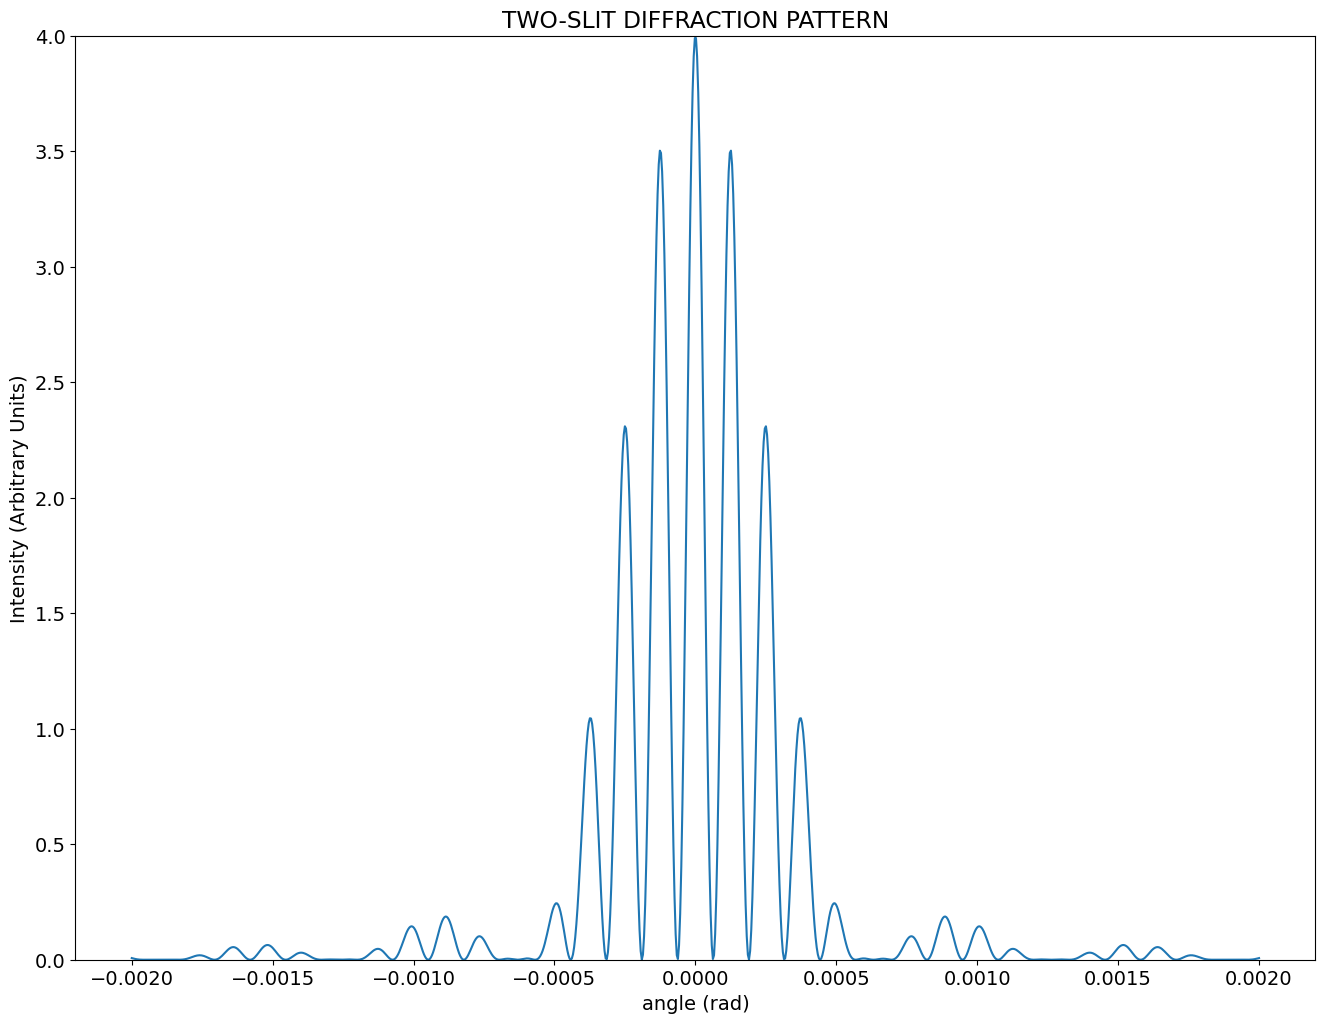

In [ ]:
# Set the wavelength of the incident light in meters.
λ = 6.32E-7

# Define the distance between the slits in meters.
d = 0.005

# Define the width of the slits in meters.
D = 0.001

# Plot the intensity pattern of a two-slit diffraction experiment.
# The 'θ' variable (angle) and 'intensityPattern' function are used to calculate the intensity pattern.
plt.plot(θ, intensityPattern(θ, λ, d, D))

# Set the y-axis limit for the plot, defining the range of intensity values displayed.
plt.ylim(0, 4)

# Label the x-axis with a description of the plotted data.
plt.xlabel('angle (rad)')

# Label the y-axis with a description of the plotted data.
plt.ylabel('Intensity (Arbitrary Units)')

# Set the title for the plot to describe the experiment.
plt.title("TWO-SLIT DIFFRACTION PATTERN")

# Display the generated plot.
plt.show()


## Least squares regression

Consider some data points (X,Y)


We want to set the values of 'u' such that $\chi$ is as small as possible.The goal of the least square regression is to find the parameters of 'u' such that it minimizes the square of the deviation, i.e.
$$ \chi(u) = \sum_{x_i} \left( y_i - \textrm{predictedFunction}(u,x_i) \right)^2 $$

We want to minimize χ.



First let's generate a simulated intensity pattern for light diffraction based on the given parameters and adding random noise to it. Then, we will plot this intensity pattern against a range of angles in radians using a scatter plot.

This data is a stand in for some experimental measurements.

Text(0, 0.5, 'Intensity (Arbitrary Units)')

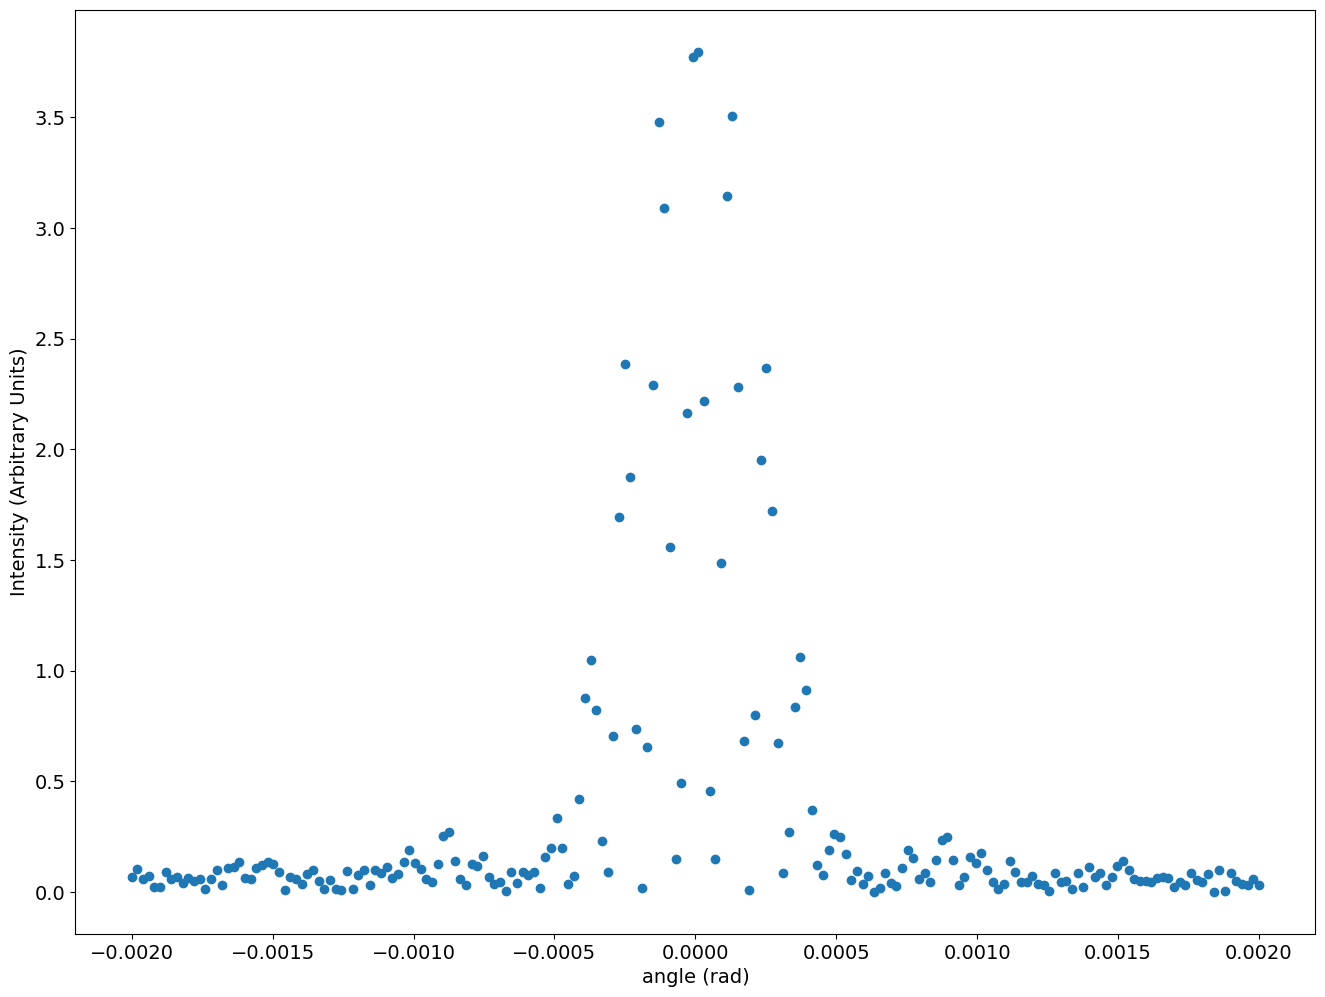

In [ ]:

# Sample data
λ=6.32E-7 ## wavelength in (m)
d=0.005 ## distance between slits in (m)
D=0.001 ## width of slits in (m)

θ_b=0.002
θ=np.linspace(-θ_b,θ_b,200)  # range of angles in radians
noise= random.rand(len(θ));
intensity = intensityPattern(θ,λ,d,D) + noise*0.1;
plt.scatter(θ,intensity)
plt.xlabel('angle (rad)')
plt.ylabel('Intensity (Arbitrary Units)')

In [ ]:
# the function that will be used for the least square regression.
# Note the order of the parameters in the function. The optimized values from the curve fit
# will be in the same order as defined in this function.

def experimentalIntensityPattern(θ, amplitude, d, D, background):
    # Define the wavelength (λ) in meters.
    λ = 6.32E-7  # wavelength in (m)

    # Return the predicted intensity pattern using parameters θ, amplitude, d, D, and background.
    # This function represents a mathematical model for the experimental intensity pattern.
    # The pattern depends on various parameters, including the angle θ, amplitude, distance between slits d,
    # width of a slit D, and background noise level.
    # The function combines diffraction and interference factors to compute the intensity pattern.
    return amplitude * diffractionFactor(β(λ, D, θ)) * interferenceFactor(α(λ, d, θ)) + background

In [ ]:
# give some initial values to our parameters
initial_params= [1, 0.005, 0.002, 1]

# Perform the least squares fit
params, covariance = curve_fit(experimentalIntensityPattern, θ, intensity, p0=initial_params )

# Extract the optimized parameters
amplitude_opt, d_opt, D_opt, background_opt = params

# Calculate the standard deviation of the parameters
amplitude_std_dev, d_std_dev, D_std_dev, background_std_dev = np.sqrt(np.diag(covariance))

# Display the optimized parameters and their standard deviations
print("Optimized parameters:")
print(f"a = {amplitude_opt} ± {amplitude_std_dev}")
print(f"b = {d_opt} ± {d_std_dev}")
print(f"c = {D_opt} ± {D_std_dev}")
print(f"b = {background_opt} ± {background_std_dev}")

Optimized parameters:
a = 1.0018777131033023 ± 0.003063320728572316
b = 0.004999180834535224 ± 2.6237043544325665e-06
c = 0.0010018664991551084 ± 3.1458425967911626e-06
b = 0.0479046819182249 ± 0.0022587992621918933


The code below generate a plot that overlays experimental data points with a fitted curve. The fitted curve is generated based on a function (experimentalIntensityPattern) and a set of optimized parameters. This kind of visualization is often used in scientific and data analysis contexts to compare experimental data with model predictions or fits. It helps in understanding how well the model fits the data.

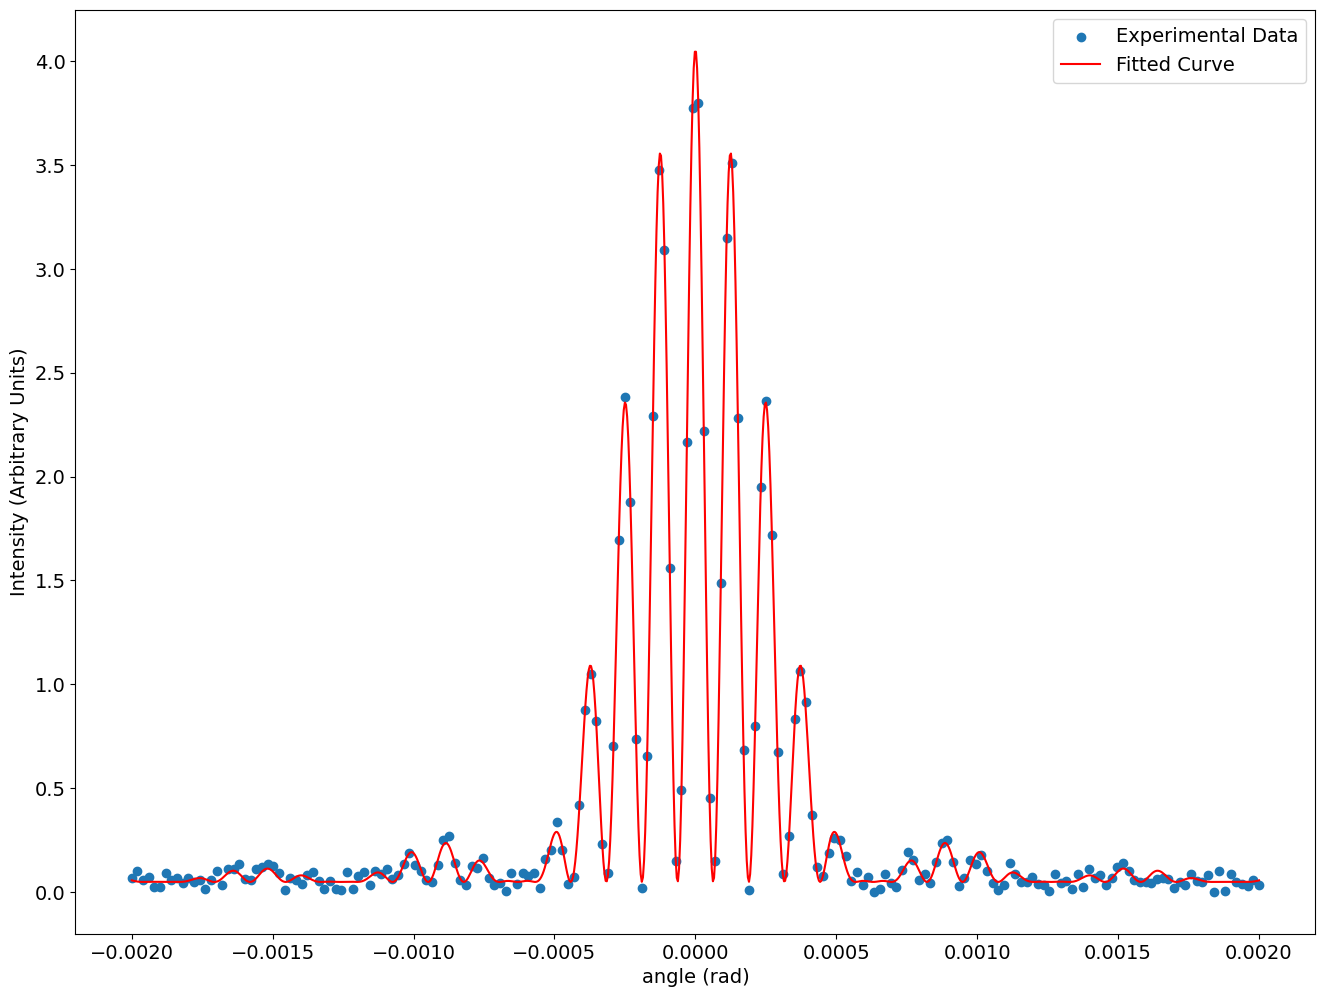

In [ ]:
# Plot the original data and the fitted curve
plt.scatter(θ, intensity, label='Experimental Data')
θ_fit = np.linspace(θ.min(), θ.max(), 1000)
y_fit = experimentalIntensityPattern(θ_fit, amplitude_opt, d_opt, D_opt, background_opt)
plt.plot(θ_fit, y_fit, 'r-', label='Fitted Curve')
plt.xlabel('angle (rad)')
plt.ylabel('Intensity (Arbitrary Units)')
plt.legend()
plt.show()

In [ ]:
θ.max()

0.002

## Curve Fitting for Diffraction and Interference from two-Slits

In [ ]:
import pandas

# the data in the folder content may get erased by colab
#df = pandas.read_excel('ExcelFakeDataInterference.xlsx', sheet_name='Sheet1')

In [ ]:
#df.iloc[:,:]

In [ ]:
#df.plot(x='X',y='I');

In [ ]:
#unpackedArray = df.values

In [ ]:
data_str = """
1,1.0
2,2.2
3,6.5
4,8
"""

# Initialize empty lists to store x and y values
x_values = []
y_values = []

# Split the data string into lines
lines = data_str.split('\n')

# Iterate through each line and split it into x and y values
for line in lines:
    parts = line.split(',')
    if len(parts) == 2:
        x_values.append(float(parts[0]))
        y_values.append(float(parts[1]))

# Print the parsed data
for x, y in zip(x_values, y_values):
    print(f"x: {x}, y: {y}")

x: 1.0, y: 1.0
x: 2.0, y: 2.2
x: 3.0, y: 6.5
x: 4.0, y: 8.0


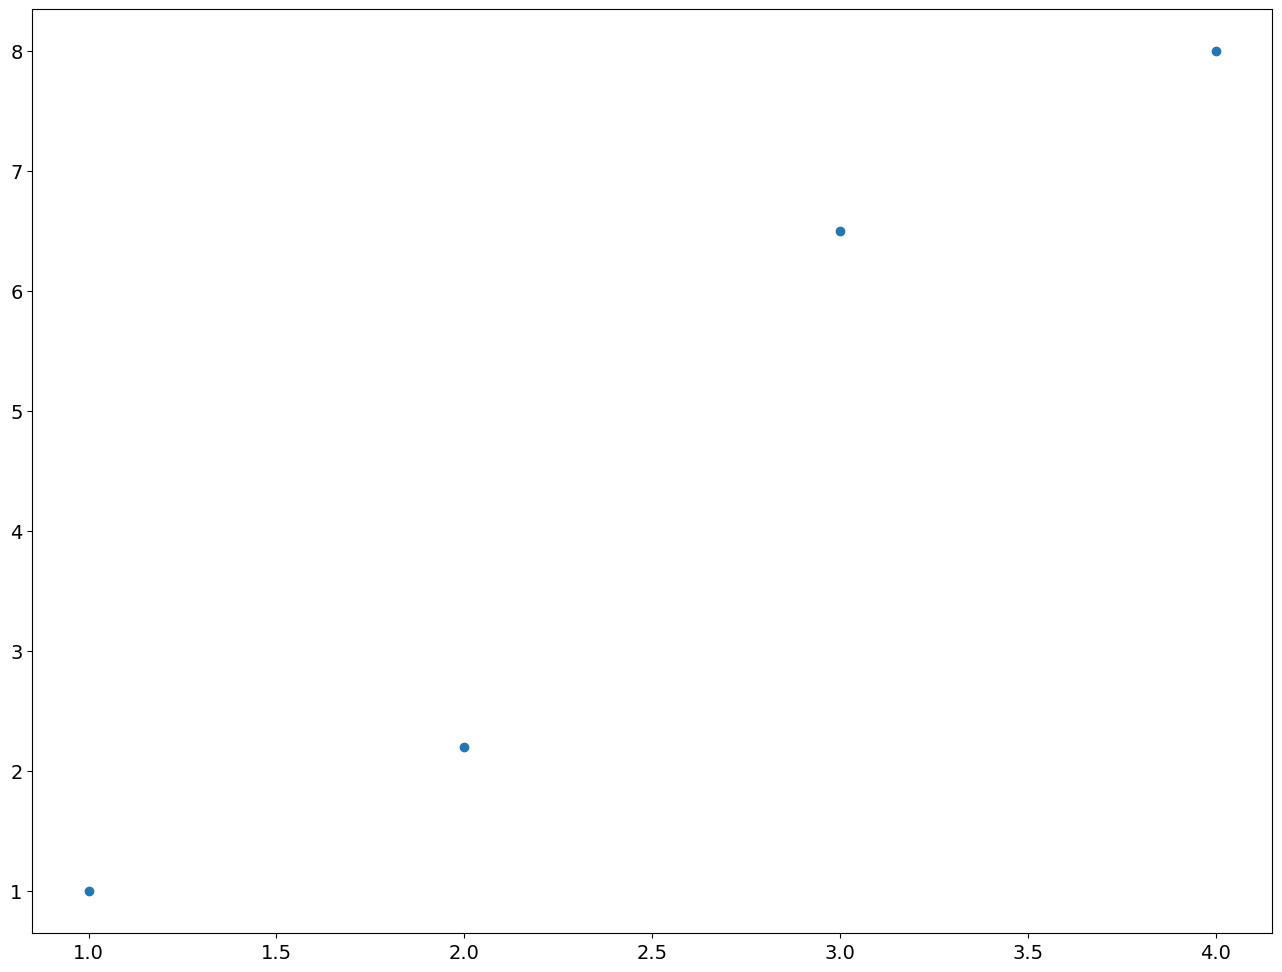

In [ ]:
# Plot the original data and the fitted curve
plt.scatter(x_values, y_values, label='Experimental Data')
plt.show()